📊 Step-by-Step ML Pipeline (Enterprise-Grade)

1.    Problem Definition & Dataset Selection

2.    Data Collection & Understanding

3.    Exploratory Data Analysis (EDA)

4.    Data Cleaning

5.    Feature Engineering

6.    Feature Scaling: Normalization & Standardization

7.    Train-Test Split & Cross-Validation

8.    Model Selection & Baseline Modeling

9.    Model Tuning (Hyperparameter Optimization + Regularization)

10.    Evaluation with the Right Metrics

11.    Bias & Variance Tradeoff

12.    Final Model & Saving

13.    Deployment (optional: FastAPI, Flask, etc.)



✅ Step 1: Problem Definition

Goal: Predict whether a patient has heart disease based on clinical features.

Type: Binary Classification
Target variable: target (1 = presence of heart disease, 0 = absence)
Metrics to focus on: F1 Score, Precision, Recall (important in medical contexts due to the cost of false negatives/positives)

📦 Step 2: Dataset Download

We'll use the Heart Disease UCI dataset from Kaggle.

Please run the following in your Colab cell to download it via Kaggle API:

In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahoorshams","key":"2b5ec3a9e9700362b646e3b095c12b8d"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ronitf/heart-disease-uci
!unzip heart-disease-uci.zip


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/ronitf/heart-disease-uci
unzip:  cannot find or open heart-disease-uci.zip, heart-disease-uci.zip.zip or heart-disease-uci.zip.ZIP.


In [5]:
!wget https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv


--2025-05-09 15:58:16--  https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0.001s  

2025-05-09 15:58:16 (21.0 MB/s) - ‘heart.csv’ saved [11328/11328]



In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")

# Display the first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Class distribution
print("\nClass distribution:\n", df['target'].value_counts())


Dataset shape: (303, 14)

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Summary statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000 

📊 Step 4: Data Preprocessing

Before modeling, it's essential to preprocess the data:

1.    Feature Scaling: Standardize features to have a mean of 0 and a standard deviation of 1.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df.drop('target', axis=1)
scaled_features = scaler.fit_transform(features)


2. Train-Test Split: Divide the data into training and testing sets.
<a>ieee-dataport.org<a/>

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, df['target'], test_size=0.2, random_state=42, stratify=df['target']
)


🧠 Step 5: Model Training and Evaluation

Train a logistic regression model and evaluate its performance:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



This will provide precision, recall, F1-score, and accuracy metrics to assess the model's performance.

✅ Step 6: Compare Multiple Models with Cross-Validation

We'll evaluate:

1.    Logistic Regression

2.    Random Forest

3.    XGBoost

4.    Support Vector Machine (SVM)

All with 5-fold cross-validation using F1 Score to handle class imbalance.

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True)
}

# Custom scorer
f1 = make_scorer(f1_score)

# Perform cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=f1)
    print(f"🔹 {name} F1 Score (CV Mean): {scores.mean():.4f}")


🔹 Logistic Regression F1 Score (CV Mean): 0.8526
🔹 Random Forest F1 Score (CV Mean): 0.8504


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:11:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:11:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:11:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:11:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:11:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

🔹 XGBoost F1 Score (CV Mean): 0.8088
🔹 SVM F1 Score (CV Mean): 0.8270


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("🔍 Best F1 Score:", grid_rf.best_score_)
print("🔧 Best Parameters:", grid_rf.best_params_)


🔍 Best F1 Score: 0.8569585654391243
🔧 Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [13]:
from xgboost import XGBClassifier

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.3],
    "scale_pos_weight": [10, 50, 100]  # class imbalance control
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

print("🔍 XGBoost Best F1 Score:", grid_xgb.best_score_)
print("🔧 Best Parameters:", grid_xgb.best_params_)


🔍 XGBoost Best F1 Score: 0.83797902415574
🔧 Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'scale_pos_weight': 50}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:16:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [14]:
from sklearn.svm import SVC

param_grid_svc = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

svc = SVC(probability=True)

grid_svc = GridSearchCV(
    svc,
    param_grid_svc,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_svc.fit(X_train, y_train)

print("🔍 SVM Best F1 Score:", grid_svc.best_score_)
print("🔧 Best Parameters:", grid_svc.best_params_)


🔍 SVM Best F1 Score: 0.8599533799533798
🔧 Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


✅ Step 8: Final Evaluation on Test Set

We’ll evaluate the following for each model:

*    Accuracy

*    Precision

*    Recall

*    F1 Score

*    ROC AUC

*    Confusion Matrix

First, define a shared evaluation function:

In [15]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

def evaluate_final_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n🔹 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [16]:
# Best estimators from grid search
best_xgb = grid_xgb.best_estimator_
best_svc = grid_svc.best_estimator_

evaluate_final_model("XGBoost (Tuned)", best_xgb, X_test, y_test)
evaluate_final_model("SVM (Tuned)", best_svc, X_test, y_test)



🔹 XGBoost (Tuned)
Accuracy: 0.7704918032786885
Precision: 0.7111111111111111
Recall: 0.9696969696969697
F1 Score: 0.8205128205128205
ROC AUC: 0.8701298701298701
Confusion Matrix:
 [[15 13]
 [ 1 32]]

🔹 SVM (Tuned)
Accuracy: 0.7868852459016393
Precision: 0.75
Recall: 0.9090909090909091
F1 Score: 0.821917808219178
ROC AUC: 0.8841991341991342
Confusion Matrix:
 [[18 10]
 [ 3 30]]


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


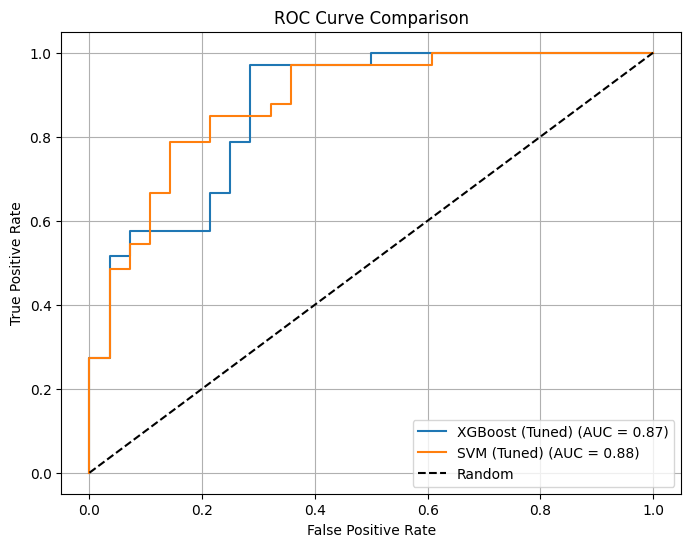

In [18]:
models = {
    "XGBoost (Tuned)": best_xgb,
    "SVM (Tuned)": best_svc
}

plot_roc_curves(models, X_test, y_test)


In [19]:
import joblib

# Save the model
joblib.dump(best_xgb, "heart_disease_xgboost_model.pkl")
print("✅ Model saved as heart_disease_xgboost_model.pkl")


✅ Model saved as heart_disease_xgboost_model.pkl


<Figure size 1000x600 with 0 Axes>

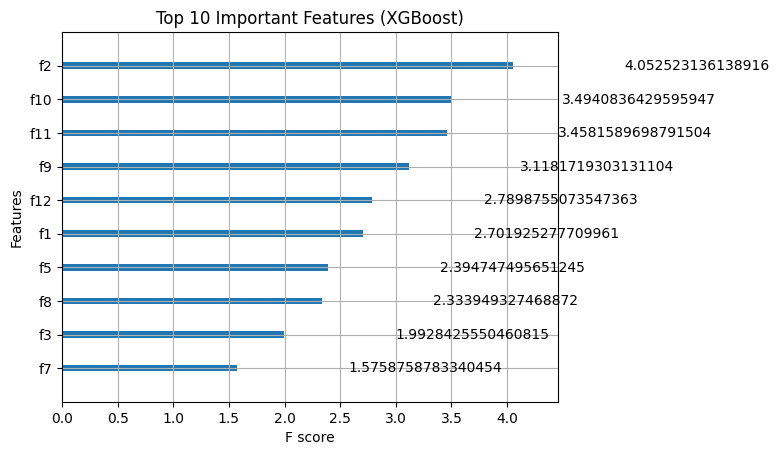

In [20]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(best_xgb, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features (XGBoost)")
plt.show()
